# Zachary's Karate Club Friendship Network

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
G = nx.read_gml('networks/karate/karate.gml', label = 'id')

## Visualização

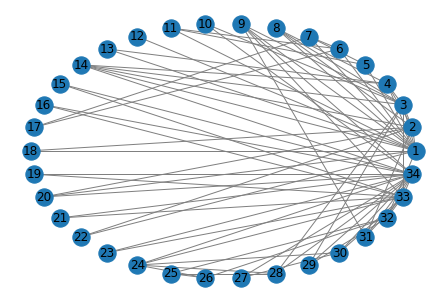

In [6]:
nx.draw_circular(G, with_labels=True, edge_color='grey')
plt.show()

## Caracterização

In [158]:
n = G.number_of_nodes()
m = G.number_of_edges()
print('Número de vértices:', n)
print('Número de arestas:', m)
print('Grafo conexo?',nx.is_connected(G))

Número de vértices: 34
Número de arestas: 78
Grafo conexo? True


### 1) Grau

In [159]:
degrees = np.array([val for (node, val) in G.degree()])

In [160]:
from statistics import median
print('Máximo:', degrees.max())
print('Mínimo:', degrees.min())
print('Média:',degrees.mean())
print('Mediana:', median(degrees))
print('Desvio padrão:', degrees.std())


Máximo: 17
Mínimo: 1
Média: 4.588235294117647
Mediana: 3.0
Desvio padrão: 3.820360677912828


#### Distribuição empírica

PMF:

[ 1  2  3  4  5  6  9 10 12 16 17]
[ 1 11  6  6  3  2  1  1  1  1  1]


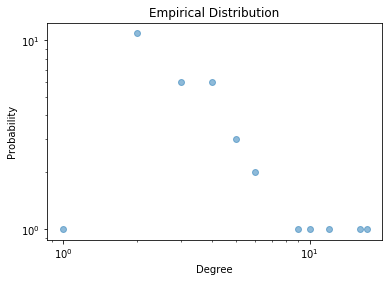

In [177]:
x, f = np.unique(degrees, return_counts=True)
print(x)
print(f)
pmf = f/f.sum()

plt.figure(figsize=(5,5))
plt.scatter(x,f,alpha=0.5)
plt.title('Empirical Distribution')
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.xscale('log')
plt.yscale('log')
plt.show()

CCDF:

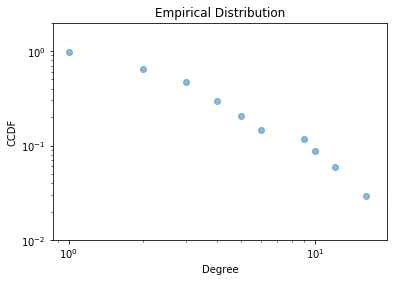

In [178]:
cdf = f.cumsum()/f.sum()
ccdf = 1-cdf

plt.figure(figsize=(5,5))
plt.scatter(x,ccdf,alpha=0.5)
plt.title('Empirical Distribution')
plt.xlabel('Degree')
plt.ylabel('CCDF')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**-2, 2*10**0)
plt.show()

Salva o vetor para posterior plotagem junto com as outras redes:

In [179]:
np.savetxt('vectors/karate-degree-ccdf.txt', [ccdf], delimiter=',', fmt='%f')
np.savetxt('vectors/karate-degree-x.txt', [x], delimiter=',', fmt='%d')

### 2) Distância 

Calculando a distância entre cada par de vértices:

In [166]:
dist = np.array([])
for v in G.nodes():
    spl = nx.single_source_shortest_path_length(G, v) # distância short path lenght
    spl2 = dict((v2,d) for v2,d in spl.items() if v2 != v) # distância exluindo d(v,v)
    dist = np.append(dist, list(spl2.values()))
print(dist)

[1. 1. 1. ... 3. 3. 4.]


Estatísticas básicas:

In [167]:
print('Máximo:', dist.max())
print('Mínimo:', dist.min())
print('Média:',dist.mean())
print('Mediana:', median(dist))
print('Desvio padrão:', dist.std())

Máximo: 5.0
Mínimo: 1.0
Média: 2.408199643493761
Mediana: 2.0
Desvio padrão: 0.9303002808496257


Verificando o cálculo da distância média através do método disponibilizado pela biblioteca:

In [168]:
d_mean = nx.average_shortest_path_length(G)
print('Distância média:',d_mean)

Distância média: 2.408199643493761


Distribuição empírica:

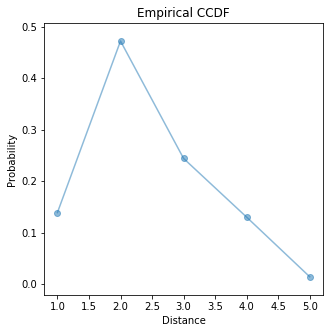

In [175]:
x, f_d = np.unique(dist, return_counts=True)
pmf = f_d/f_d.sum()

plt.figure(figsize=(5,5))
plt.title('Empirical CCDF')
plt.xlabel('Distance')
plt.ylabel('Probability')

plt.scatter(x,pmf,alpha=0.5)
plt.plot(x,pmf, alpha=0.5)
plt.show()

CCDF:

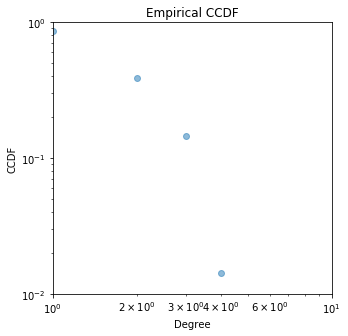

In [174]:
cdf = f_d.cumsum()/f_d.sum()
ccdf = 1-cdf

plt.figure(figsize=(5,5))
plt.scatter(x,ccdf,alpha=0.5)
plt.title('Empirical CCDF')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('CCDF')
plt.ylim(10**-2, 10**0)
plt.xlim(10**0, 10**1)
plt.show()

In [180]:
np.savetxt('vectors/karate-dist-x.txt', [x], delimiter=',', fmt='%d')
np.savetxt('vectors/karate-dist-pmf.txt', [pmf], delimiter=',', fmt='%f')
np.savetxt('vectors/karate-dist-ccdf.txt', [ccdf], delimiter=',', fmt='%f')

### 3) Tamanho das componentes conexas

Número de componentes conexas:

In [804]:
nx.number_connected_components(G)

1

Tamanho das componentes:

In [805]:
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

[34]

### 4) Clusterização

#### 4.1) Clusterização Local

In [55]:
cluster = np.array(list(nx.clustering(G).values()))
print('Máximo:', cluster.max())
print('Mínimo:', cluster.min())
print('Média:', cluster.mean())
print('Mediana:', median(cluster))
print('Desvio padrão:', cluster.std())

Máximo: 1.0
Mínimo: 0.0
Média: 0.5706384782076823
Mediana: 0.5
Desvio padrão: 0.342266011779565


Verificando a clusterização média:

In [56]:
nx.average_clustering(G)

0.5706384782076823

PMF:

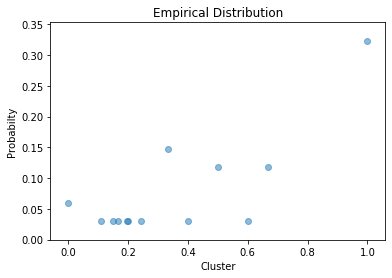

In [79]:
x, f = np.unique(cluster, return_counts=True)
pmf = f/f.sum()
plt.scatter(x,pmf, alpha=0.5)
plt.title('Empirical Distribution')
plt.xlabel('Cluster')
plt.ylabel('Probabilty')
#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(10**0, 10**-2)
#plt.xlim(10**-1, 2*10**0)
plt.show()

CCDF:

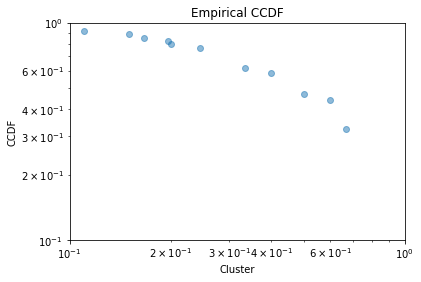

In [143]:
x, f = np.unique(cluster, return_counts=True)
cdf = f.cumsum()/f.sum()
ccdf = 1-cdf
plt.scatter(x,ccdf, alpha=0.5)
plt.title('Empirical CCDF')
plt.xlabel('Cluster')
plt.ylabel('CCDF')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**-1, 10**0)
plt.xlim(10**-1, 10**0)
plt.show()

#### 4.2) Clusterização global

In [810]:
n_triang = np.array(list(nx.triangles(G).values())).sum()/3 # método conta 3 vezes o triângula (1x para cada vértice)
print('Número de triângulos:', n_triang)

Número de triângulos: 45.0


Clusterização global:

In [811]:
nx.transitivity(G)

0.2556818181818182

### 5) Centralidade

#### 5.1) Centralidade de Grau

In [132]:
cent = np.array(list(nx.degree_centrality(G).values()))
print('Máximo:', cent.max())
print('Mínimo:', cent.min())
print('Média:', cent.mean())
print('Mediana:', median(cent))
print('Desvio padrão:', cent.std())

Máximo: 0.5151515151515151
Mínimo: 0.030303030303030304
Média: 0.1390374331550802
Mediana: 0.09090909090909091
Desvio padrão: 0.11576850539129781


CCDF:

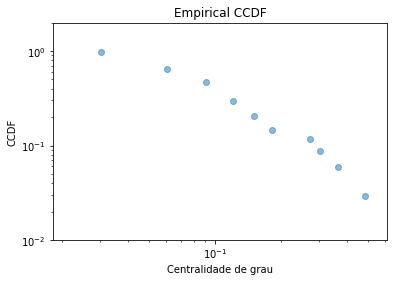

In [137]:
x, f = np.unique(cent, return_counts=True)
cdf = f.cumsum()/f.sum()
ccdf = 1-cdf
plt.scatter(x,ccdf,alpha=0.5)
plt.title('Empirical CCDF')
plt.xlabel('Centralidade de grau')
plt.ylabel('CCDF')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**-2, 2*10**0)
plt.show()

#### 5.2) Betweeness

In [81]:
btw = np.array(list(nx.betweenness_centrality(G).values()))
print('Máximo:', btw.max())
print('Mínimo:', btw.min())
print('Média:', btw.mean())
print('Mediana:', median(btw))
print('Desvio padrão:', btw.std())

Máximo: 0.43763528138528146
Mínimo: 0.0
Média: 0.044006238859180036
Mediana: 0.0025658369408369406
Desvio padrão: 0.09254294988248436


CCDF:

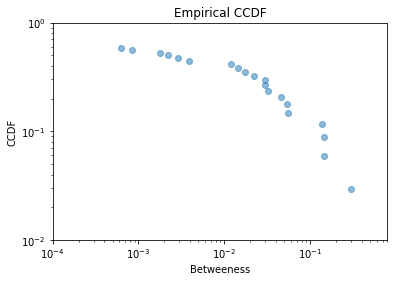

In [130]:
x, f = np.unique(btw, return_counts=True)
cdf = f.cumsum()/f.sum()
ccdf = 1-cdf
plt.scatter(x,ccdf,alpha=0.5)
plt.title('Empirical CCDF')
plt.xlabel('Betweeness')
plt.ylabel('CCDF')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**-2, 10**0)
plt.xlim(10**-4, 8*10**-1)
plt.show()

Visualziação do Betweenes:

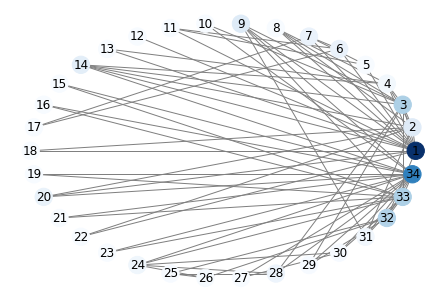

In [152]:
nx.draw_circular(G, node_color=btw, cmap=plt.cm.Blues, with_labels=True,edge_color='grey')

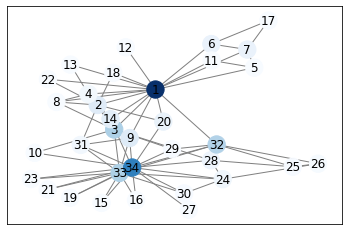

In [187]:
import random
random.seed(42)
np.random.seed(42)
nx.draw_networkx(G, node_color=btw, cmap=plt.cm.Blues, with_labels=True,edge_color='grey')
plt.savefig('relatorio/karate-betweeness.pdf')

#### 5.3) Closeness

In [87]:
close = np.array(list(nx.closeness_centrality(G).values()))
print('Máximo:', close.max())
print('Mínimo:', close.min())
print('Média:', close.mean())
print('Mediana:', median(close))
print('Desvio padrão:', close.std())

Máximo: 0.5689655172413793
Mínimo: 0.28448275862068967
Média: 0.4264796325735234
Mediana: 0.38372093023255816
Desvio padrão: 0.07102385104221558


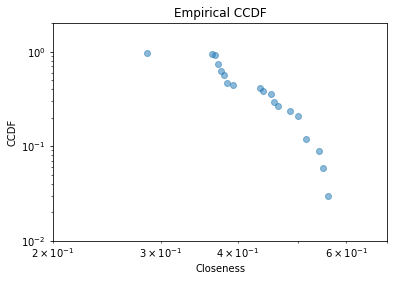

In [146]:
x, f = np.unique(close, return_counts=True)
cdf = f.cumsum()/f.sum()
ccdf = 1-cdf
plt.scatter(x,ccdf, alpha=0.5)
plt.title('Empirical CCDF')
plt.xlabel('Closeness')
plt.ylabel('CCDF')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**-2, 2*10**0)
plt.xlim(2*10**-1, 7*10**-1)
plt.show()

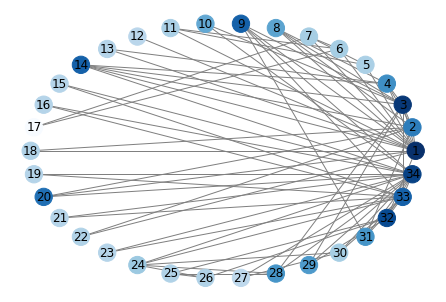

In [153]:
nx.draw_circular(G, node_color=close, cmap=plt.cm.Blues, with_labels=True, edge_color='grey')

#### 5.4) Auto-Vetor

In [118]:
ev = np.array(list(nx.eigenvector_centrality(G).values()))
print('Máximo:', ev.max())
print('Mínimo:', ev.min())
print('Média:', ev.mean())
print('Mediana:', median(ev))
print('Desvio padrão:', ev.std())

Máximo: 0.373371213013235
Mínimo: 0.023634794260596875
Média: 0.14641138111110436
Mediana: 0.10204073438454295
Desvio padrão: 0.089305499198097


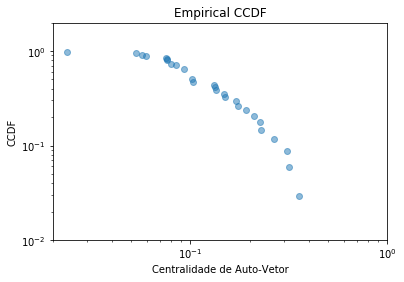

In [129]:
x, f = np.unique(ev, return_counts=True)
cdf = f.cumsum()/f.sum()
ccdf = 1-cdf
plt.scatter(x,ccdf, alpha=0.5)
plt.title('Empirical CCDF')
plt.xlabel('Centralidade de Auto-Vetor')
plt.ylabel('CCDF')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**-2, 2*10**0)
plt.xlim(2*10**-2, 10**0)
plt.show()

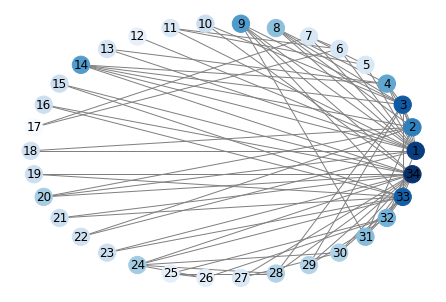

In [154]:
nx.draw_circular(G, node_color=ev, cmap=plt.cm.Blues, with_labels=True, edge_color='grey')

#### 5.5) PageRank

In [101]:
pr = np.array(list(nx.pagerank(G, alpha=0.9).values()))
print('Máximo:', pr.max())
print('Mínimo:', pr.min())
print('Média:', pr.mean())
print('Mediana:', median(pr))
print('Desvio padrão:', pr.std())

Máximo: 0.10345460652842152
Mínimo: 0.008523220243546811
Média: 0.029411764705882353
Mediana: 0.02129205163493875
Desvio padrão: 0.02268437677519535


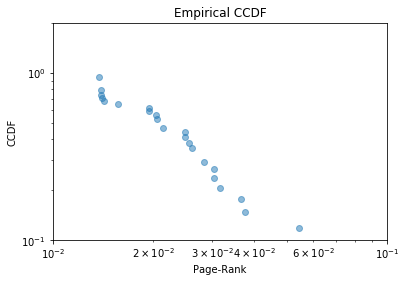

In [105]:
x, f = np.unique(pr, return_counts=True)
cdf = f.cumsum()/f.sum()
ccdf = 1-cdf
plt.scatter(x,ccdf, alpha=0.5)
plt.title('Empirical CCDF')
plt.xlabel('Page-Rank')
plt.ylabel('CCDF')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**-1, 2*10**0)
plt.xlim(10**-2, 10**-1)
plt.show()

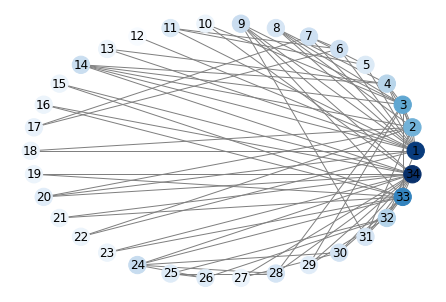

In [155]:
nx.draw_circular(G, node_color=pr, cmap=plt.cm.Blues, with_labels=True, edge_color='grey')

### 6) Similaridade

#### 6.1) Jaccard

In [107]:
jaccard = np.array([p for (u, v, p) in nx.jaccard_coefficient(G)])
print('Máximo:', jaccard.max())
print('Mínimo:', jaccard.min())
print('Média:', jaccard.mean())
print('Mediana:', median(jaccard))
print('Desvio padrão:', jaccard.std())

Máximo: 1.0
Mínimo: 0.0
Média: 0.15214237132461966
Mediana: 0.09090909090909091
Desvio padrão: 0.20488274065459014


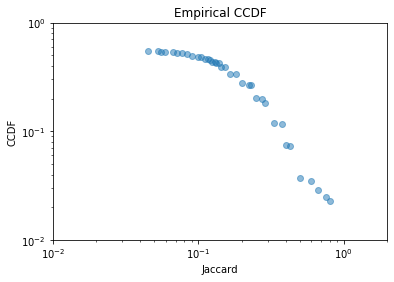

In [156]:
x, f = np.unique(jaccard, return_counts=True)
cdf = f.cumsum()/f.sum()
ccdf = 1-cdf
plt.scatter(x,ccdf, alpha=0.5)
plt.title('Empirical CCDF')
plt.xlabel('Jaccard')
plt.ylabel('CCDF')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**-2, 10**0)
plt.xlim(10**-2, 2*10**0)
plt.show()

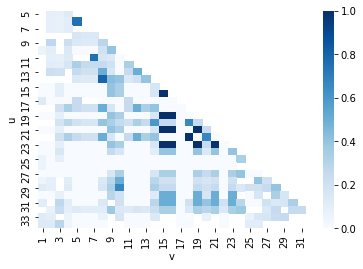

In [188]:
mapa = [[u,v, p] for (u, v, p) in nx.jaccard_coefficient(G)]

import pandas as pd
df = pd.DataFrame(mapa)
df.set_index([0,1],inplace=True)
df_m = df.unstack(level=0)

import seaborn as sns
ax = sns.heatmap(df_m, cmap=plt.cm.Blues)
locs, labels = plt.xticks()
plt.xticks(locs,range(1,33,2))
plt.xlabel('v')
plt.ylabel('u')
plt.savefig('relatorio/karate-jaccard.pdf')

#### 6.2) Adamic/Adar

In [112]:
adamic = np.array([p for (u, v, p) in nx.adamic_adar_index(G)])
print('Máximo:', adamic.max())
print('Mínimo:', adamic.min())
print('Média:', adamic.mean())
print('Mediana:', median(adamic))
print('Desvio padrão:', adamic.std())

Máximo: 4.719381261461351
Mínimo: 0.0
Média: 0.34660169559173803
Mediana: 0.35295612386476116
Desvio padrão: 0.45611399967946203


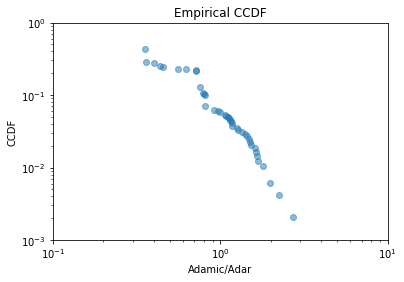

In [116]:
x, f = np.unique(adamic, return_counts=True)
cdf = f.cumsum()/f.sum()
ccdf = 1-cdf
plt.scatter(x,ccdf, alpha=0.5)
plt.title('Empirical CCDF')
plt.xlabel('Adamic/Adar')
plt.ylabel('CCDF')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**-3, 10**0)
plt.xlim(10**-1, 10**1)
plt.show()

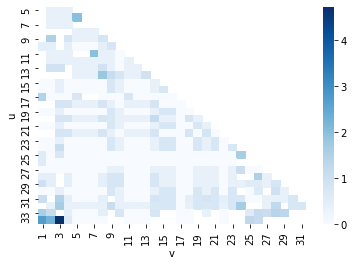

In [114]:
#pairs = dict([((u,v), p) for (u, v, p) in nx.adamic_adar_index(G)])
mapa = [[u,v, p] for (u, v, p) in nx.adamic_adar_index(G)]

import pandas as pd
df = pd.DataFrame(mapa)
df.set_index([0,1],inplace=True)
df_m = df.unstack(level=0)

import seaborn as sns
ax = sns.heatmap(df_m, cmap=plt.cm.Blues)
locs, labels = plt.xticks()
plt.xticks(locs,range(1,34,2))
plt.xlabel('v')
plt.ylabel('u')
plt.show()